# Visualize Central Limit Theorem Through Bootstrapping

What is central limit theorem?

Central limit theorem states that the sample average follows a normal distribution with expectation $\mu$ and variance $\frac{\sigma^2}{n}$

What is bootstrap?

Bootstrapping is any test or metric that uses random sampling with replacement.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy import stats

In [11]:
data = pd.read_csv('Data/Salaries.csv')

C:\Users\daiki\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (3,4,5,6,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


This data represents salaries in San Francisco City from 2011-2014

In [12]:
data.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [13]:
income = data['TotalPay'].dropna()
income = income.values.tolist()

C:\Users\daiki\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


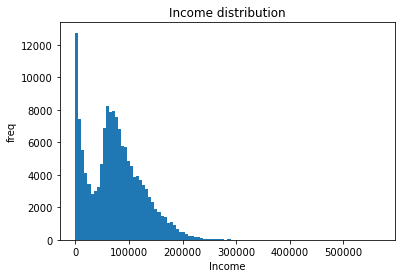

In [14]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.hist(income, bins=100)
ax.set_title('Income distribution')
ax.set_xlabel('Income')
ax.set_ylabel('freq')
fig.show()

In [15]:
np.mean(income)

74768.82910206994

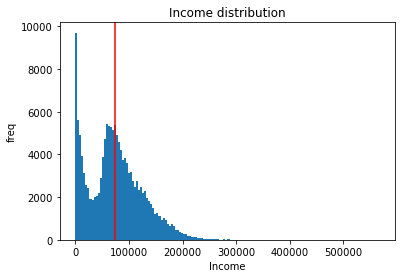

In [16]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.hist(income, bins=150)
ax.axvline(x = np.mean(income), color='r')
ax.set_title('Income distribution')
ax.set_xlabel('Income')
ax.set_ylabel('freq')
fig.show()

The red line represents the mean income.

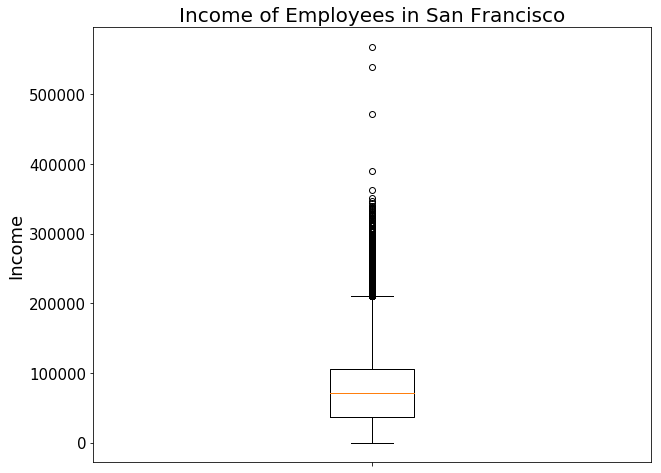

In [17]:
fig, axs = plt.subplots(figsize=(10,8))
axs.boxplot([income])
plt.title('Income of Employees in San Francisco', fontsize=20)
axs.set_xticklabels('')
axs.set_ylabel('Income', fontsize=18)
axs.tick_params(labelsize=15)
plt.show()

In [18]:
print('Number of people: ', len(income))
print('Mean: ', np.mean(income))
print('Median: ', np.median(income))
print('Maximum: ', np.max(income))

Number of people:  148653
Mean:  74768.82910206994
Median:  71427.04
Maximum:  567595.43


The mean is greater than the median, which suggests that the data is skewed.

We will use this dataset for visualizing central limit theorem

This is sample with replacement (1 element can be taken several times)

In [25]:
means = []

for i in range(100000):
    a = random.choices(income, k=100)
    means.append(np.mean(a))

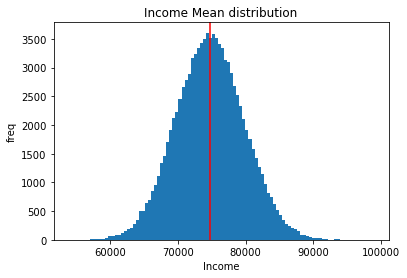

In [26]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.hist(means, bins=100)
ax.axvline(x = np.mean(income), color='r')
ax.set_title('Income Mean distribution')
ax.set_xlabel('Income')
ax.set_ylabel('freq')
fig.show()

Let's visualize the standard error. Standard error is the standard deviation of the statistic (sample average in this case), and we can prove that:

$$
Var(\bar{X}) = Var\left(\frac{\sum_{i=1}^nX_i}{n} \right) = \frac{1}{n^2}n\cdot Var(X) = \frac{\sigma^2}{n}
$$
This follows from the fact that all $X_i$'s are 
Since we don't know the exact value of $\sigma^2$, we estimate it by using $s^s$, which is the sample variance. This leads us to the formula:
$$
SE(\bar{X}) = \frac{s}{\sqrt{n}}
$$

However, in this problm, we know the exact value of $\sigma^2$. Why?

In this example, the entire population is all the people in the dataset, so $\sigma^2$ can be easily determined by using: `np.var(income)`. Let's see.

In [29]:
std = np.std(income)
print("Population std is:", std)

Population std is: 50516.626875032634


Now, the sample size is 100, as we randomly took 100 samples from the original data to get the sample average. The standard error of the means can be determined by using the following equation:

In [31]:
se = std/np.sqrt(100)
print(se)

5051.662687503263


Now, let's see how the sample average is located around the standard error:

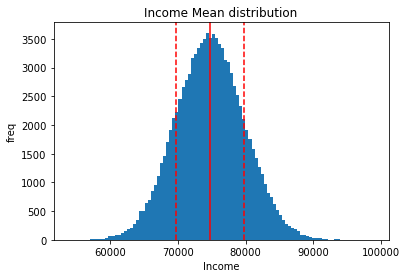

In [34]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.hist(means, bins=100)
ax.axvline(x = np.mean(income), color='r')
ax.axvline(x = np.mean(income)-se, color='r', ls='--')
ax.axvline(x = np.mean(income)+se, color='r', ls='--')
ax.set_title('Income Mean distribution')
ax.set_xlabel('Income')
ax.set_ylabel('freq')
fig.show()

Let's examine how many of them are located in this region:

In [37]:
count = 0
for i in range(100000):
    if means[i] >= np.mean(income)-se and means[i] <= np.mean(income)+se:
        count += 1
print(count / 100000)

KeyboardInterrupt: 

We will change the number of samples

1. Sample size = 10

In [36]:
means10 = []

for i in range(1000):
    a = random.sample(income, k=10)
    means10.append(np.mean(a))

C:\Users\daiki\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


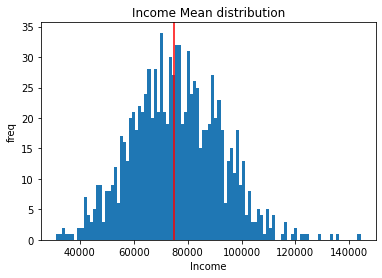

In [38]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.hist(means10, bins=100)
ax.axvline(x = np.mean(income), color='r')
ax.set_title('Income Mean distribution')
ax.set_xlabel('Income')
ax.set_ylabel('freq')
fig.show()

2. Sample size = 50

In [39]:
means50 = []

for i in range(1000):
    a = random.sample(income, k=50)
    means50.append(np.mean(a))

C:\Users\daiki\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


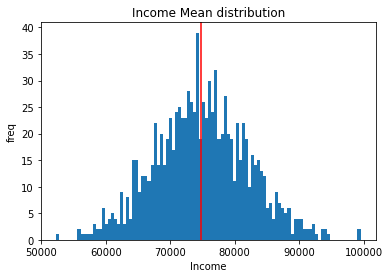

In [40]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.hist(means50, bins=100)
ax.axvline(x = np.mean(income), color='r')
ax.set_title('Income Mean distribution')
ax.set_xlabel('Income')
ax.set_ylabel('freq')
fig.show()

2. Sample size = 100

C:\Users\daiki\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


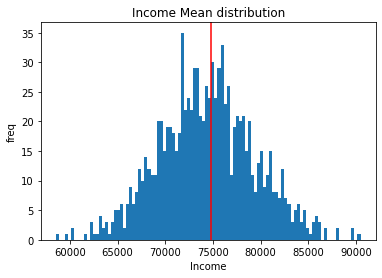

In [28]:
means100 = []

for i in range(1000):
    a = random.sample(income, k=100)
    means100.append(np.mean(a))

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.hist(means100, bins=100)
ax.axvline(x = np.mean(income), color='r')
ax.set_title('Income Mean distribution')
ax.set_xlabel('Income')
ax.set_ylabel('freq')
fig.show()

2. Sample size = 500

C:\Users\daiki\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


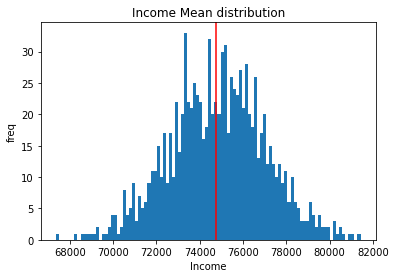

In [42]:
means500 = []

for i in range(1000):
    a = random.sample(income, k=500)
    means500.append(np.mean(a))

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.hist(means500, bins=100)
ax.axvline(x = np.mean(income), color='r')
ax.set_title('Income Mean distribution')
ax.set_xlabel('Income')
ax.set_ylabel('freq')
fig.show()

3. Sample size = 1,000

C:\Users\daiki\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


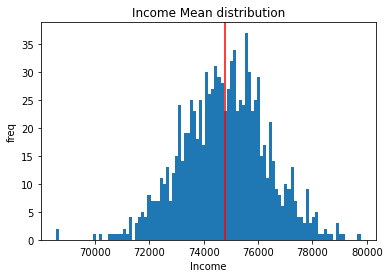

In [45]:
means1000 = []

for i in range(1000):
    a = random.sample(income, k=1000)
    means1000.append(np.mean(a))

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.hist(means1000, bins=100)
ax.axvline(x = np.mean(income), color='r')
ax.set_title('Income Mean distribution')
ax.set_xlabel('Income')
ax.set_ylabel('freq')
fig.show()

4. Sample size = 10,000

In [44]:
means10000 = []

for i in range(1000):
    a = random.sample(income, k=10000)
    means10000.append(np.mean(a))

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.hist(means10000, bins=100)
ax.axvline(x = np.mean(income), color='r')
ax.set_title('Income Mean distribution')
ax.set_xlabel('Income')
ax.set_ylabel('freq')
fig.show()

KeyboardInterrupt: 

Now, we will compare them.

In [52]:
len(means1000)

1000

In [62]:
max(means1000)

79765.85213

In [65]:
import math

def bin_size(data):
    w = 500
    n = math.ceil((max(data) - min(data)) / w)
    return n

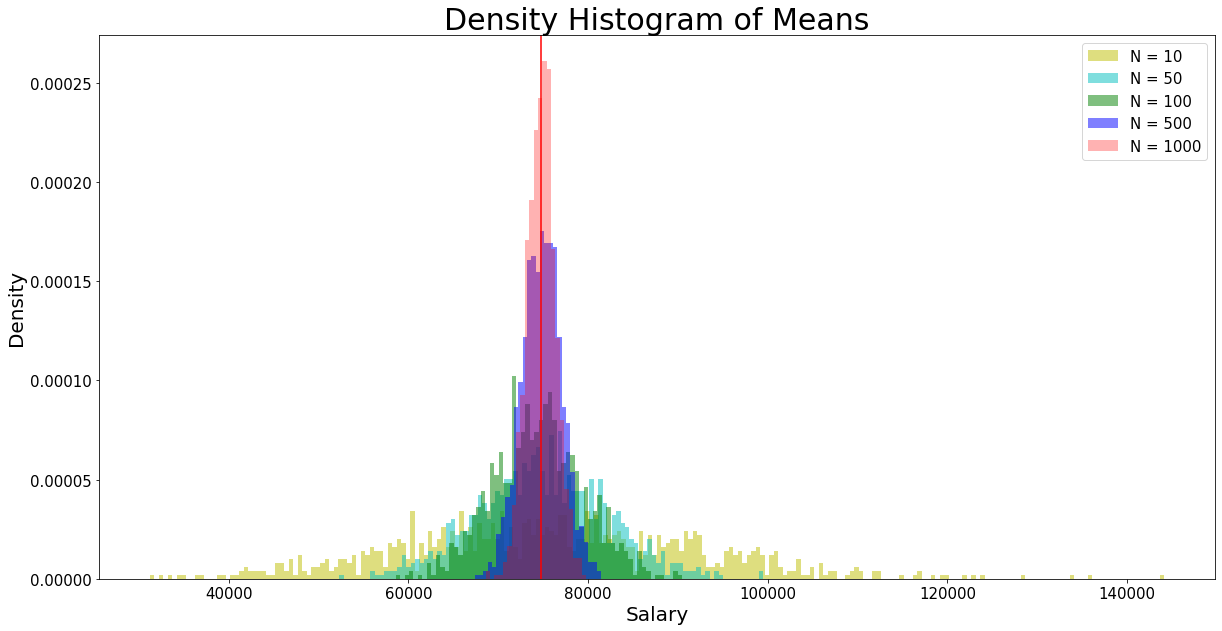

In [73]:
kwargs = dict(alpha=0.5, bins=100)

plt.figure(figsize=(20,10))
plt.hist(means10, alpha=0.5, bins=bin_size(means10), color='y', label='N = 10', density=True)
plt.hist(means50, alpha=0.5, bins=bin_size(means50), color='c', label='N = 50', density=True)
plt.hist(means100, alpha=0.5, bins=bin_size(means100), color='g', label='N = 100', density=True)
plt.hist(means500, alpha=0.5, bins=bin_size(means500), color='b', label='N = 500', density=True)
plt.hist(means1000, alpha=0.3, bins=bin_size(means1000), color='r', label='N = 1000', density=True)
#plt.hist(means10000, **kwargs, color='b', label='N = 10,000', density=True)
#plt.hist(means_max, **kwargs, color='r', label='N = 100,000')
#plt.hline(x=np.mean(income), color='r')
plt.axvline(np.mean(income), color='r')
plt.title('Density Histogram of Means', size=30)

plt.ylabel('Density', size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('Salary', size=20)
plt.legend(fontsize=15)
plt.show()

As we can see, it's better to take a larger sample size to estimate the mean salary.

The expectation of the mean:

$$ E(\bar{x}) = \mu$$

doesn't depend on the sample size, but the standard error of the mean gets smaller with sample size:

$$ SE(\bar{x}) = \frac{\sigma}{\sqrt{n}}$$

In [ ]:
# sample without replacement
# drop 100,000
# Calculate standard error and show it
# SE --> s/sqrt(n) / impossible to get sigma^2 from data